# Feature selection lab - WDBC
Lab developed by Gary Marigliano - 07.2018

Now that you are a little bit more familiar with the feature selection, you are going to compare multiple features selection techniques on a real-life dataset. The Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC) is a dataset that contains 30 features (computed from digitalized images). You can have the full details [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

The 1st column is the sample id, the 2nd contains the class (either "M" or "B" respectively malignant and benign) and the 30 last columns the features as real numbers.

## Lab goals

* Discover, use and compare some features selection algorithms with a real-life dataset
* Assess the quality of the selected features given by the algorithms


## TODO in this notebook

* Answer the questions in this notebook (where **TODO student** is written)
* Take a look at the [skfeature](http://featureselection.asu.edu/) python library. You can/should use some features selection algorithms listed here (the python library has already been installed for this project): http://featureselection.asu.edu/html/skfeature.function.html and http://featureselection.asu.edu/tutorial.php

# Prepare the dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing
import scipy

filename = r"datasets/WDBC/data_WDBC.csv"
df = pd.read_csv(filename, sep=",")
df = df.dropna(axis=1) # remove last colunm which only contains NaN values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df.drop(['id', 'diagnosis'], axis=1).values

In [4]:
# transform the categorical diagnosis values into numerical values. This is required by many algorithms.
le = preprocessing.LabelEncoder()
le.fit(df["diagnosis"].values)
print("The classes are:",le.classes_)
y = le.transform(df["diagnosis"].values)

print("X contains (n_samples, n_features) =", X.shape)

The classes are: ['B' 'M']
X contains (n_samples, n_features) = (569, 30)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Extract good features using features selection algorithms

In this part you will extract good features by trying several features selection algorithms. 

Remember that to extract relevant features you can use filter, wrapper or embedded based methods. You can use machine learning based techniques such as read the synaptic weights of an ANN, get the features importance from an ExtraTree,... or you can use statistical based techniques such as analyzing the variance of the variables.


**TODO student**

* Pick 3 features selection techniques from http://featureselection.asu.edu/html/skfeature.function.html
* For each of them:
    * Explain using 20-40 words the idea behind this feature selection technique. You will need to do some research to do that. If you don't understand it, pick an other ;-)
    * Indicate the family of this feature selection technique (filter, wrapper, embedded, statistical/ML-based,...)
    * Plot the features importance (the same way you did in the previous notebook)

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf.fit(X_train, y_train)

def plot_importances(importances, score):
    fig, ax = plt.subplots(figsize=(10,5))
    
    sorted_y = sorted(score, reverse=True)
    
    labels = list(map(lambda x : 'Feat. {}'.format(x), importances))

    ax.set_xlabel('Features')
    ax.set_ylabel('Score')
    ax.set_title('Scores per features')
    ax.get_xaxis().set_visible(False)
    rects = ax.patches

    ax.bar(np.arange(0, len(importances)), sorted_y, 0.8)
    ax.set_xticklabels(importances)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom', rotation = 90)
        
def compare_importances(importances_1, importances_2):
    print(importances_1==importances_2)

## Fisher Score (Similarity Based)
This function implements the fisher score feature selection, steps are as follows:
- Construct the affinity matrix W in fisher score way
- For the r-th feature, we define fr = X(:,r), D = diag(W*ones), ones = [1,...,1]', L = D - W
- Let fr_hat = fr - (fr'*D*ones)*ones/(ones'*D*ones)
- Fisher score for the r-th feature is score = (fr_hat'*D*fr_hat)/(fr_hat'*L*fr_hat)-1

The Fisher Scoring maximizes the likelihood by getting closer to the maximum at each iteration. It stops when the likelihood is not increasing anymore. In case of multiple local maximum, it could potentially give different answers with similar liklihood. It's usually due to lack of information, because of the sample size.

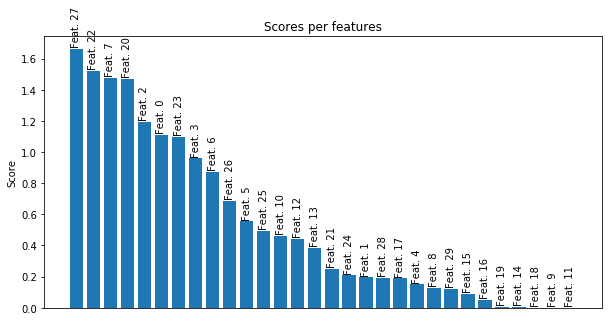

In [7]:
from skfeature.function.similarity_based import fisher_score

score_fisher = fisher_score.fisher_score(X_train, y_train)
idx_fisher = fisher_score.feature_ranking(score_fisher)

plot_importances(idx_fisher, score_fisher)

## F-Score (Statistical Based)
This function implements the anova f_value feature selection (existing method for classification in scikit-learn),
where f_score = sum((ni/(c-1))*(mean_i - mean)^2)/((1/(n - c))*sum((ni-1)*std_i^2))

The F-Score is a system used to report system performances based on the precision and recall. It takes care of the potential unconsistency of good precision and bad recall, or inversely. The recall of the a system is the percentage of correct classification for a given class. The precision of a system is the percentage of correct classification in the predicted outputs for a given class.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


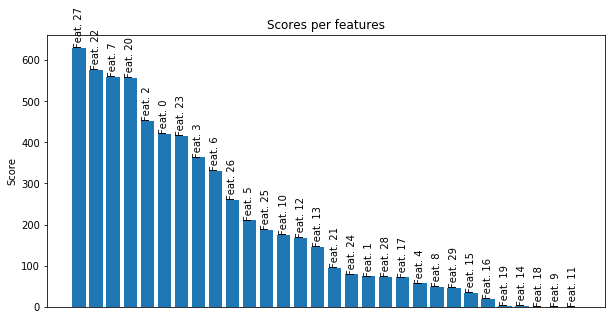

In [8]:
from skfeature.function.statistical_based import f_score

score_f_score = f_score.f_score(X_train, y_train)
idx_f_score = f_score.feature_ranking(score_fisher)

plot_importances(idx_f_score, score_f_score)
compare_importances(idx_fisher,idx_f_score)

## T-Score (Statistical Based)
This function calculates t_score for each feature, where t_score is only used for binary problem
t_score = |mean1-mean2|/sqrt(((std1^2)/n1)+((std2^2)/n2)))

The T-Score is a form of a standardized statistical test. It takes an individual score and transform it into a standardized form which helps to compare scores. It is used when the population standard deviation is unknown and that the sample size is small, generally under 30.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


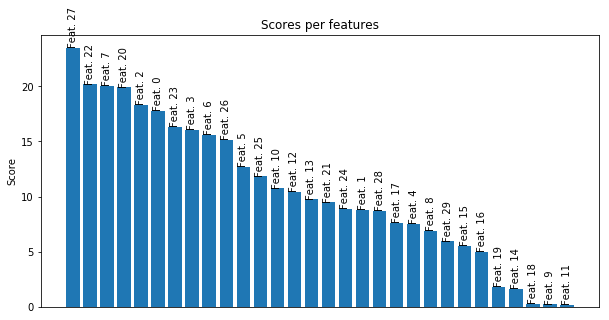

In [9]:
from skfeature.function.statistical_based import t_score

score_t_score = t_score.t_score(X_train, y_train)
idx_t_score = t_score.feature_ranking(score_fisher)

plot_importances(idx_t_score, score_t_score)
compare_importances(idx_fisher,idx_t_score)

* Choose N features to you find relevant
    * Justify N and the chosen features
    * Analyze the stability of the selected features (does the FS algorithm always return the same list of features ? Prove it)
* Comment the 3 features importance plots. Here are some clues about the questions you should ask yourself:
    * Are the features selected by the 3 FS techniques similars ?
    * Are the number of features selected by the 3 FS techniques the same ?
* Keep the lists of selected features. You will need them later.

In [10]:
X_names = df.drop(['id', 'diagnosis'], axis=1)
def get_top_index(num_fea=3):
    return idx_fisher[0:num_fea]

best_index = get_top_index(4)
for i in best_index:
    print(X_names.columns[i], i)

concave points_worst 27
perimeter_worst 22
concave points_mean 7
radius_worst 20


- All three features selected (fisher, t-score, f-score) are returning the same features.
- From the 30 extracted features we are picking the top 4 (22,18,0,9), which are above a score of 20 and above the second gap:
    - concave points_worst
    - perimeter_worst
    - radius_worst
    - concave points_mean
- In theory, as we can see, in all 3 FS, there is a gap after top 1, meaning that it could be enough to be a fair selector.
- The third big gap is at top 10.
- The T-Score and the F-Score could be seen as similar technics because they are both statistically based.
- The number of features if the same for all three technics because the results are the same.

# Assess the selected features

Now that you have lists of features (i.e. the 3 lists of N features your chosen FS techniques gave you), we are going to assess the relevance of these features.

To do that you are going to create a function that takes a list of features as input and returns one or more score metrics (accuracy, f1-score, sensibility, specificity,...) for this given list. Inside that function several classifiers will be used to evaluate the performance they can achieve using the selected features. Here is an example of this function:

``` python
def evaluate_features(features):
    score_clf_1 = compute_score_using_classifier_1(features)
    score_clf_2 = compute_score_using_classifier_2(features)
    score_clf_3 = compute_score_using_classifier_3(features)
    # ....
    return find_a_way_to_show_these_scores_nicely(score_clf_1, score_clf_2, score_clf_3)
```

You may be careful to the following points:
* the classifiers you use may not be determinist therefore you may want to run them multiple time to have an averaged score
* try to choose classifiers that are relatively different regarding how they use the data. Using 3 classifiers that are tree-based is not the best idea you can have
* try to choose classifiers that you didn't use to get the lists of features in the first place

**TODO student**

* Write the `evaluate_features()` function with at least 3 classifiers (for example ANN, SVM and KNN)
* Use this function with the lists you got from your FS algorithms
* Use this function with a random list of selected features (same size as the others lists)
* Use this function with all the features
* Make a plot similar to the one just below (see https://matplotlib.org/examples/api/barchart_demo.html)

<img src="assets/02-WDBC-perf-plot.png" />

In [11]:
#TODO student...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/4., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
            
def find_a_way_to_show_these_scores_nicely(index, score_clf_1, score_clf_2, score_clf_3): 
    N_features = 3
    score_clf_1_mean = score_clf_1[0]
    score_clf_1_std = score_clf_1[1]
    
    score_clf_2_mean = score_clf_2[0]
    score_clf_2_std = score_clf_2[1]
    
    score_clf_3_mean = score_clf_3[0]
    score_clf_3_std = score_clf_3[1]

    ind = np.arange(N_features)  # the x locations for the groups
    width = 0.20       # the width of the bars

    fig, ax = plt.subplots(figsize=(15,5))
    rects1 = ax.bar(ind, score_clf_1_mean, width, color='b', yerr=score_clf_1_std)
    rects2 = ax.bar(ind + width, score_clf_2_mean, width, color='orange', yerr=score_clf_2_std)
    rects3 = ax.bar(ind + 2*width, score_clf_3_mean, width, color='g', yerr=score_clf_3_std)


    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores by classifiers and by lists of '+str(len(index))+' features')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(('Selected Features','Random Features','All Features'))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('KNN', 'LinearSVC','MLP'),loc='upper left')

    autolabel(rects1,ax)
    autolabel(rects2,ax)
    autolabel(rects3,ax)

    plt.show()
    
def evaluate_features(features):
    score_clf_1 = compute_score_using_classifier_1(features)
    score_clf_2 = compute_score_using_classifier_2(features)
    score_clf_3 = compute_score_using_classifier_3(features)
    # ....
    return find_a_way_to_show_these_scores_nicely(features,score_clf_1, score_clf_2, score_clf_3)

def compute_score_using_classifier_1(features):
    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    
    selected_features_train = X_train[:, features]
    selected_features_test = X_test[:, features]
    
    select_acc_list_1 = []
    runs = 5
    for i in range(runs):
        knn = KNeighborsClassifier(n_neighbors=i+1)
        knn.fit(selected_features_train, y_train)
        y_predict = knn.predict(selected_features_test)
        acc = accuracy_score(y_test, y_predict)
        #print(acc)
        select_acc_list_1.append(acc)
        
    from random import randint
    random_features_list = []
    for i in range(len(features)):
        random_features_list.append(randint(0, X_train.shape[1]-1))
    random_features_train = X_train[:, random_features_list]
    random_features_test = X_test[:, random_features_list]
    
    rnd_acc_list_1 = []
    runs = 5
    for i in range(runs):
        knn = KNeighborsClassifier(n_neighbors=i+1)
        knn.fit(random_features_train, y_train)
        y_predict = knn.predict(random_features_test)
        acc = accuracy_score(y_test, y_predict)
        rnd_acc_list_1.append(acc)
        
    all_acc_list_1 = []
    runs = 5
    for i in range(runs):
        knn = KNeighborsClassifier(n_neighbors=i+1)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        acc = accuracy_score(y_test, y_predict)
        all_acc_list_1.append(acc)
    
    
    return ([np.mean(select_acc_list_1),np.mean(rnd_acc_list_1),np.mean(all_acc_list_1)], [np.std(select_acc_list_1),np.std(rnd_acc_list_1),np.std(all_acc_list_1)])

def compute_score_using_classifier_2(features):
    # LinearSVC
    from sklearn import svm
    clf = svm.LinearSVC()
    from sklearn.metrics import accuracy_score
    
    selected_features_train = X_train[:, features]
    selected_features_test = X_test[:, features]
    
    select_acc_list_2 = []
    runs = 5
    for i in range(runs):
        clf.fit(selected_features_train, y_train)
        y_predict = clf.predict(selected_features_test)
        acc = accuracy_score(y_test, y_predict)
        select_acc_list_2.append(acc)
        
    from random import randint
    random_features_list = []
    for i in range(len(features)):
        random_features_list.append(randint(0, X_train.shape[1]-1))
    random_features_train = X_train[:, random_features_list]
    random_features_test = X_test[:, random_features_list]
    
    rnd_acc_list_2 = []
    runs = 5
    for i in range(runs):
        clf.fit(random_features_train, y_train)
        y_predict = clf.predict(random_features_test)
        acc = accuracy_score(y_test, y_predict)
        rnd_acc_list_2.append(acc)
        
    all_acc_list_2 = []
    runs = 5
    for i in range(runs):
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        acc = accuracy_score(y_test, y_predict)
        all_acc_list_2.append(acc)
    
    return ([np.mean(select_acc_list_2),np.mean(rnd_acc_list_2),np.mean(all_acc_list_2)], [np.std(select_acc_list_2),np.std(rnd_acc_list_2),np.std(all_acc_list_2)])

def compute_score_using_classifier_3(features):
    # MLP
    from sklearn.preprocessing import StandardScaler
    
    selected_features_train = X_train[:, features]
    selected_features_test = X_test[:, features]
    
    scaler = StandardScaler()  
    scaler.fit(selected_features_train)

    selected_features_train = scaler.transform(selected_features_train)  
    selected_features_test = scaler.transform(selected_features_test)
    
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score
    select_acc_list_3 = []
    runs = 5
    for i in range(runs):
        mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
        mlp.fit(selected_features_train, y_train)
        y_predict = mlp.predict(selected_features_test)
        acc = accuracy_score(y_test, y_predict)
        select_acc_list_3.append(acc) 
        
    from random import randint
    random_features_list = []
    for i in range(len(features)):
        random_features_list.append(randint(0, X_train.shape[1]-1))
    random_features_train = X_train[:, random_features_list]
    random_features_test = X_test[:, random_features_list]

    scaler = StandardScaler()  
    scaler.fit(random_features_train)
    random_features_train = scaler.transform(selected_features_train)  
    random_features_test = scaler.transform(selected_features_test)
    
    rdn_acc_list_3 = []
    runs = 5
    for i in range(runs):
        mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
        mlp.fit(random_features_train, y_train)
        y_predict = mlp.predict(random_features_test)
        acc = accuracy_score(y_test, y_predict)
        rdn_acc_list_3.append(acc)
    
    scaler = StandardScaler()  
    scaler.fit(X_train)
    all_features_train = scaler.transform(X_train)  
    all_features_test = scaler.transform(X_test)
    
    all_acc_list_3 = []
    runs = 5
    for i in range(runs):
        mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
        mlp.fit(all_features_train, y_train)
        y_predict = mlp.predict(all_features_test)
        acc = accuracy_score(y_test, y_predict)
        all_acc_list_3.append(acc) 
    
    return ([np.mean(select_acc_list_3),np.mean(rdn_acc_list_3),np.mean(all_acc_list_3)], [np.std(select_acc_list_3),np.std(rdn_acc_list_3),np.std(all_acc_list_3)])

[27 22  7 20  2  0 23  3  6 26  5 25 10 12 13 21 24  1 28 17]


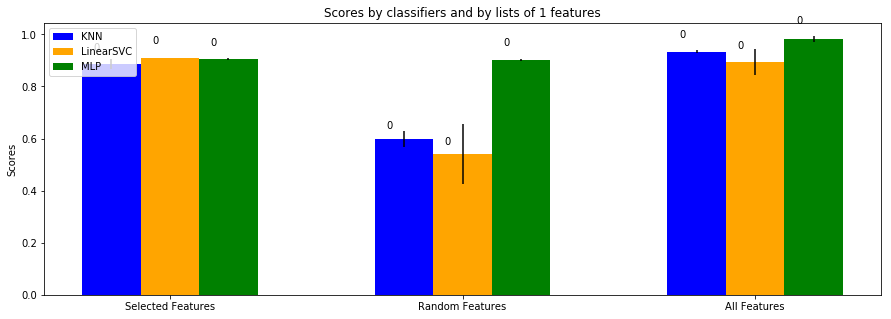

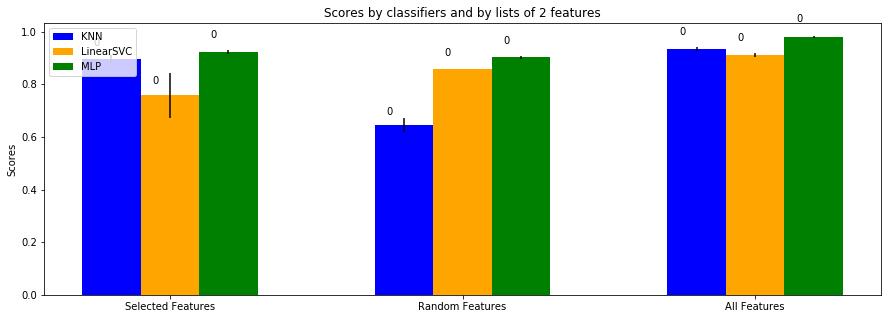

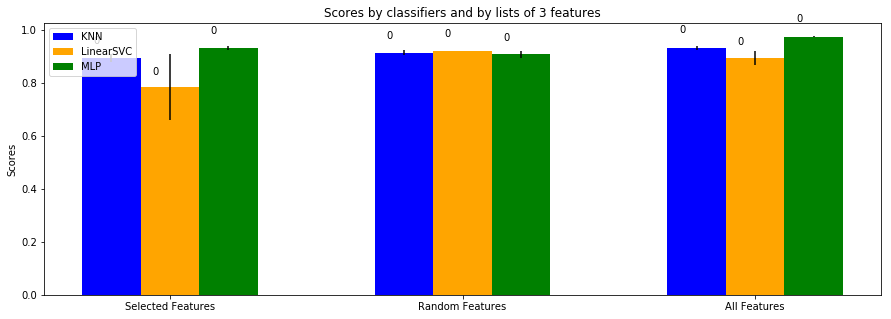

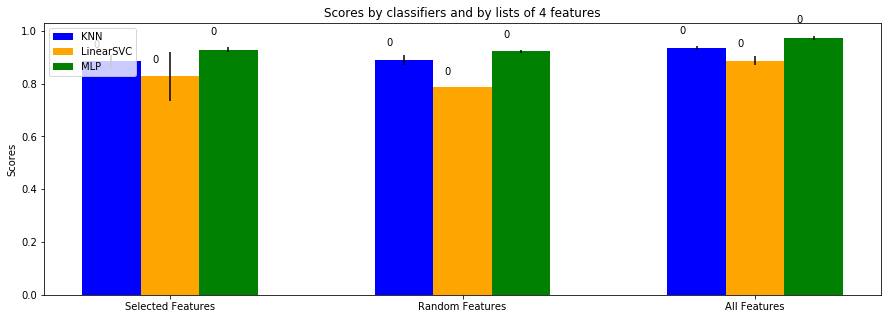

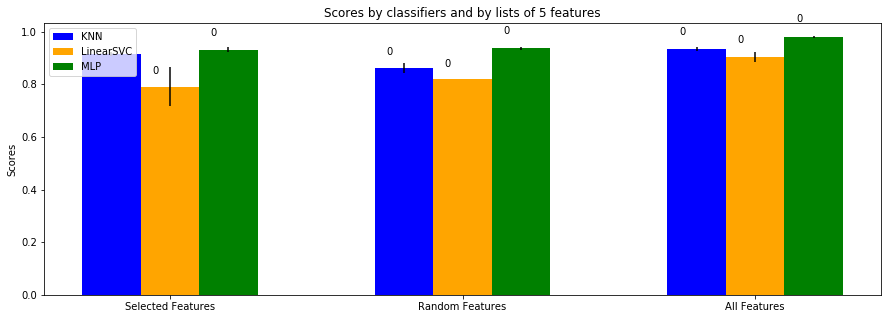

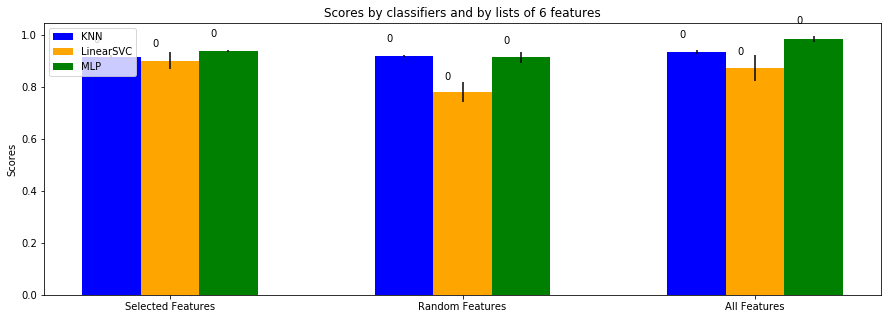

/anaconda3/envs/mse-mldb-lab3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


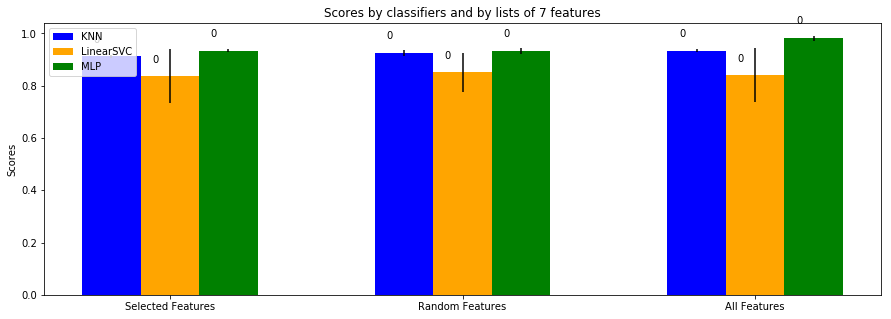

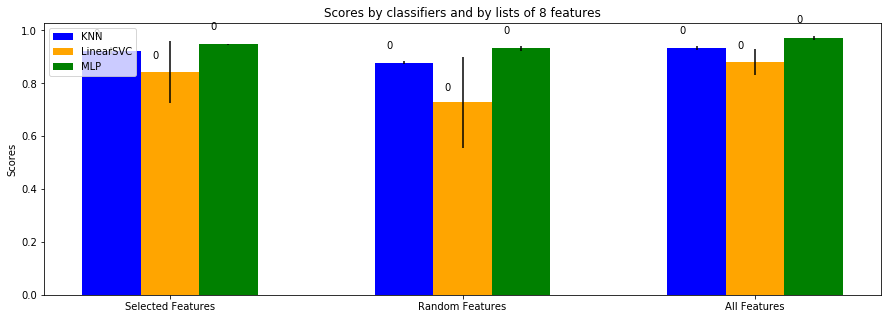

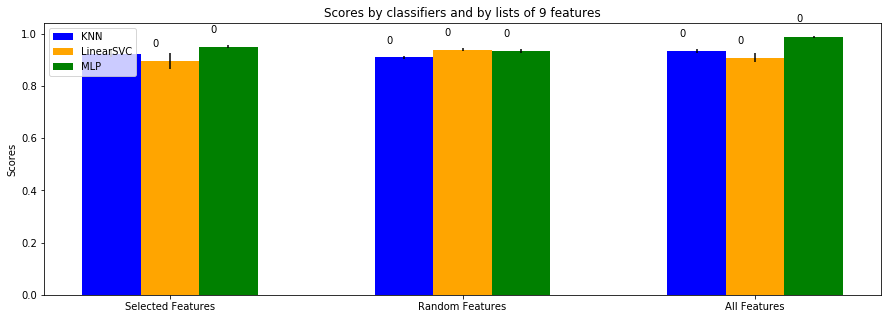

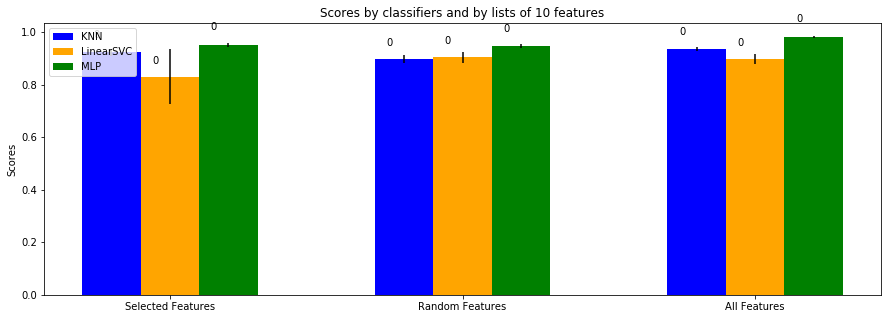

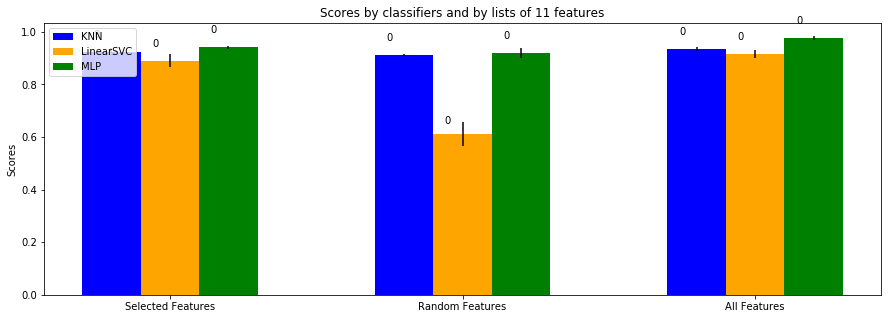

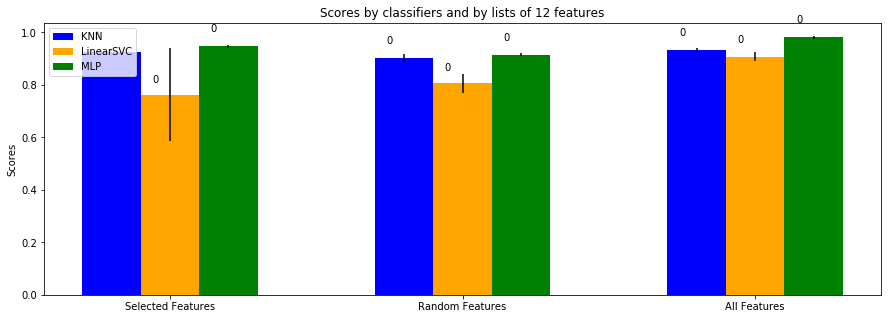

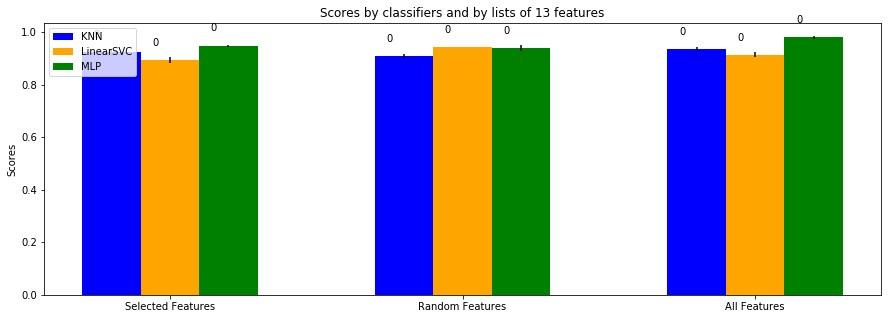

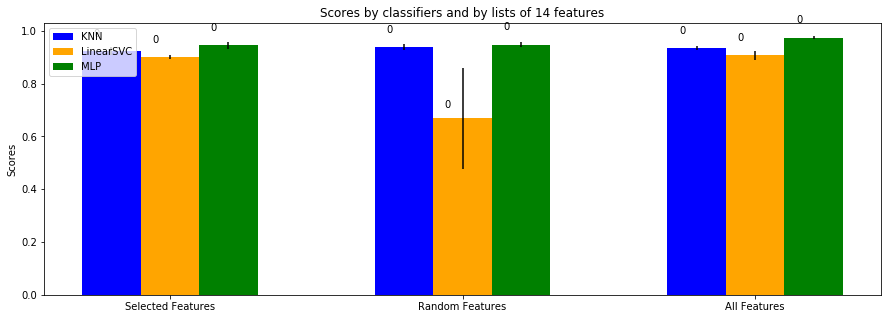

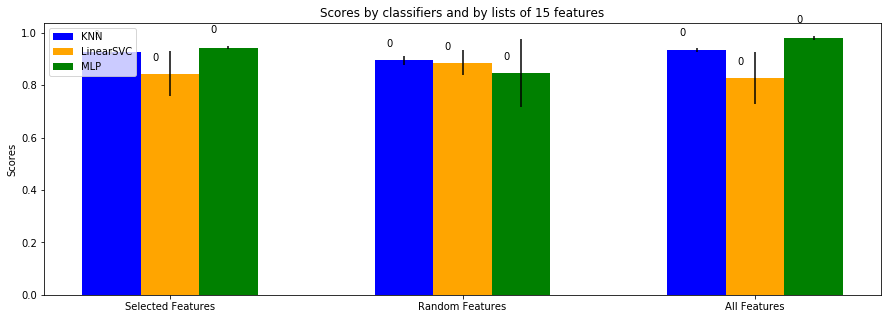

In [ ]:
runs = 20
print(get_top_index(runs))
for i in range(runs):
    top = get_top_index(i+1)
    evaluate_features(top)

* Comment the results. Here are some clues about the questions you should ask yourself:
    * How the scores of the lists of selected features behave compare to the random/all features ?
    * How behave the classifiers inside `evaluate_features()` ? Do they prefer a list in general ?

- Based on the results, we can observe that the top 1 feature (27) is good enough as a unique feature for this particular dataset.
- We can observe that the random feature selection is getting iteratively better.
- We can also observe that All Features selection is stable for KNN and MLP; however, LinearSVC is affected by randomness.
- We can finally observe that the iterative selection of best features is not lineraly improving the outcome.
- Classifiers inside evaluate_features() are indeed using lists.

### Going further (optional)

Now that you finished this notebook, it can be interesting to go a step further and try the points below:

* Can we have better results (i.e. more relevant features and/or less features) if the input data are normalized ?
* Compare the execution time between the FS algorithms you used. Given this additional information do you think you can exclude or prefer some FS techniques *for this particular case* ?
* Plot the classifier performance for the K best features where K is $1, 2,..,k_{-1},k$ and comment the results
* Anything you find relevant...

Please answer to these questions just below in this same notebook.